# Performance and investment period 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
import yfinance 

In [2]:
yfinance.pdr_override()

In [3]:
ihsg_close = wb.get_data_yahoo('^JKSE', start ='1993-01-01', end ='2023-03-31')[['Close']]

[*********************100%***********************]  1 of 1 completed


In [4]:
ihsg_close.head()

,Close
Date,
1993-01-04,273.579987
1993-01-05,273.309998
1993-01-06,274.839996
1993-01-07,276.850006
1993-01-08,279.109985


In [5]:
ihsg_close.tail()

,Close
Date,
2023-03-24,6762.253906
2023-03-27,6708.933105
2023-03-28,6760.328125
2023-03-29,6839.436035
2023-03-30,6808.951172


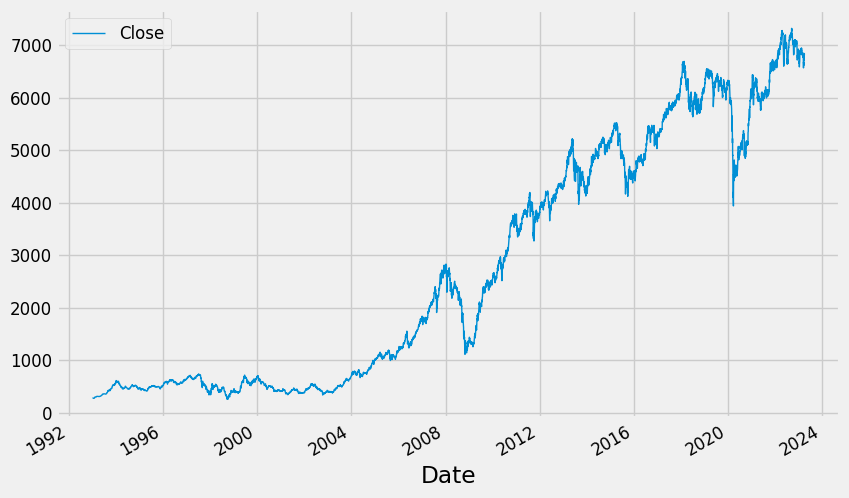

In [6]:
plt.style.use('fivethirtyeight')
ihsg_close.plot(figsize = (9,6), fontsize = 12, linewidth = 1)
plt.legend(fontsize = 12 )
plt.show()

## Resampling to get monthly Return

In [7]:
monthly_return = ihsg_close.resample("M", kind = 'period').last().pct_change().dropna()
monthly_return.tail()

,Close
Date,
2022-11,-0.002476
2022-12,-0.032578
2023-01,-0.001646
2023-02,0.000570
2023-03,-0.005010


In [8]:
monthly_return.columns = ['m_return']

### Annualize Rolling Mean Return

In [9]:
monthly_return.rolling(3 * 12).mean() * 12 

,m_return
Date,
1993-02,NaN
1993-03,NaN
1993-04,NaN
1993-05,NaN
1993-06,NaN
...,...
2022-11,0.068748
2022-12,0.041936
2023-01,0.060409


### Calculating Annualize Rolling Return For Different Investment Period

In [10]:
for year in [1,3,5,10,20] :
    monthly_return[f"{year}Y"] = monthly_return['m_return'].rolling(year * 12).mean() * 12

In [11]:
monthly_return.tail()

,m_return,1Y,3Y,5Y,10Y,20Y
Date,,,,,,
2022-11,-0.002476,0.083219,0.068748,0.045492,0.059352,0.164838
2022-12,-0.032578,0.043364,0.041936,0.025418,0.055146,0.158788
2023-01,-0.001646,0.034171,0.060409,0.017222,0.051807,0.163001
2023-02,0.000570,-0.004019,0.087947,0.017591,0.044183,0.161642
2023-03,-0.005010,-0.035636,0.142138,0.028965,0.040654,0.161544


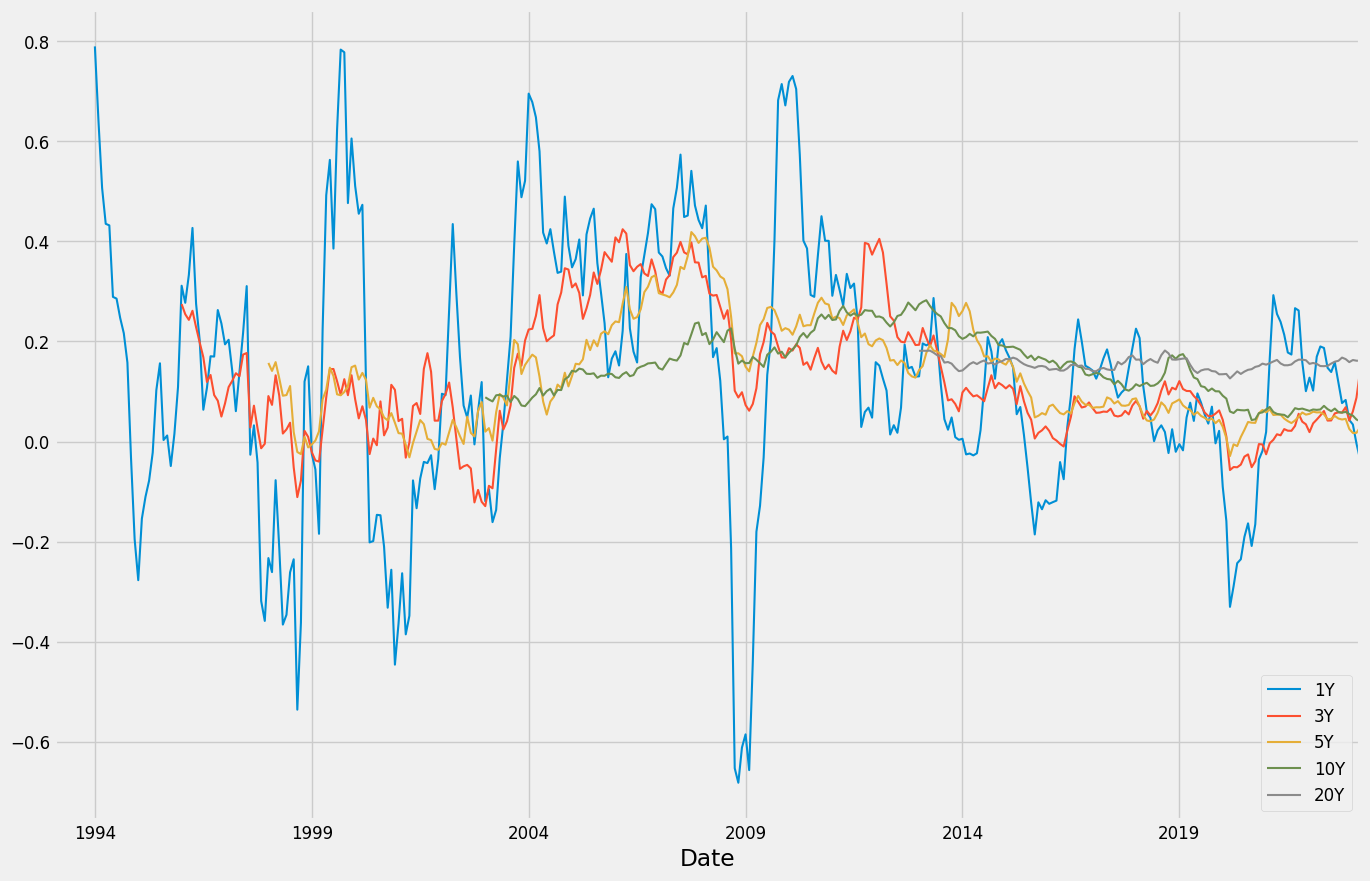

In [14]:
monthly_return.iloc[:, 1:].plot(figsize = (15,10), fontsize = 12, linewidth = 1.5)
plt.legend(loc = 'lower right', fontsize = 12)
plt.show()

#### Visualizing Annualized Return on Each Investment Period

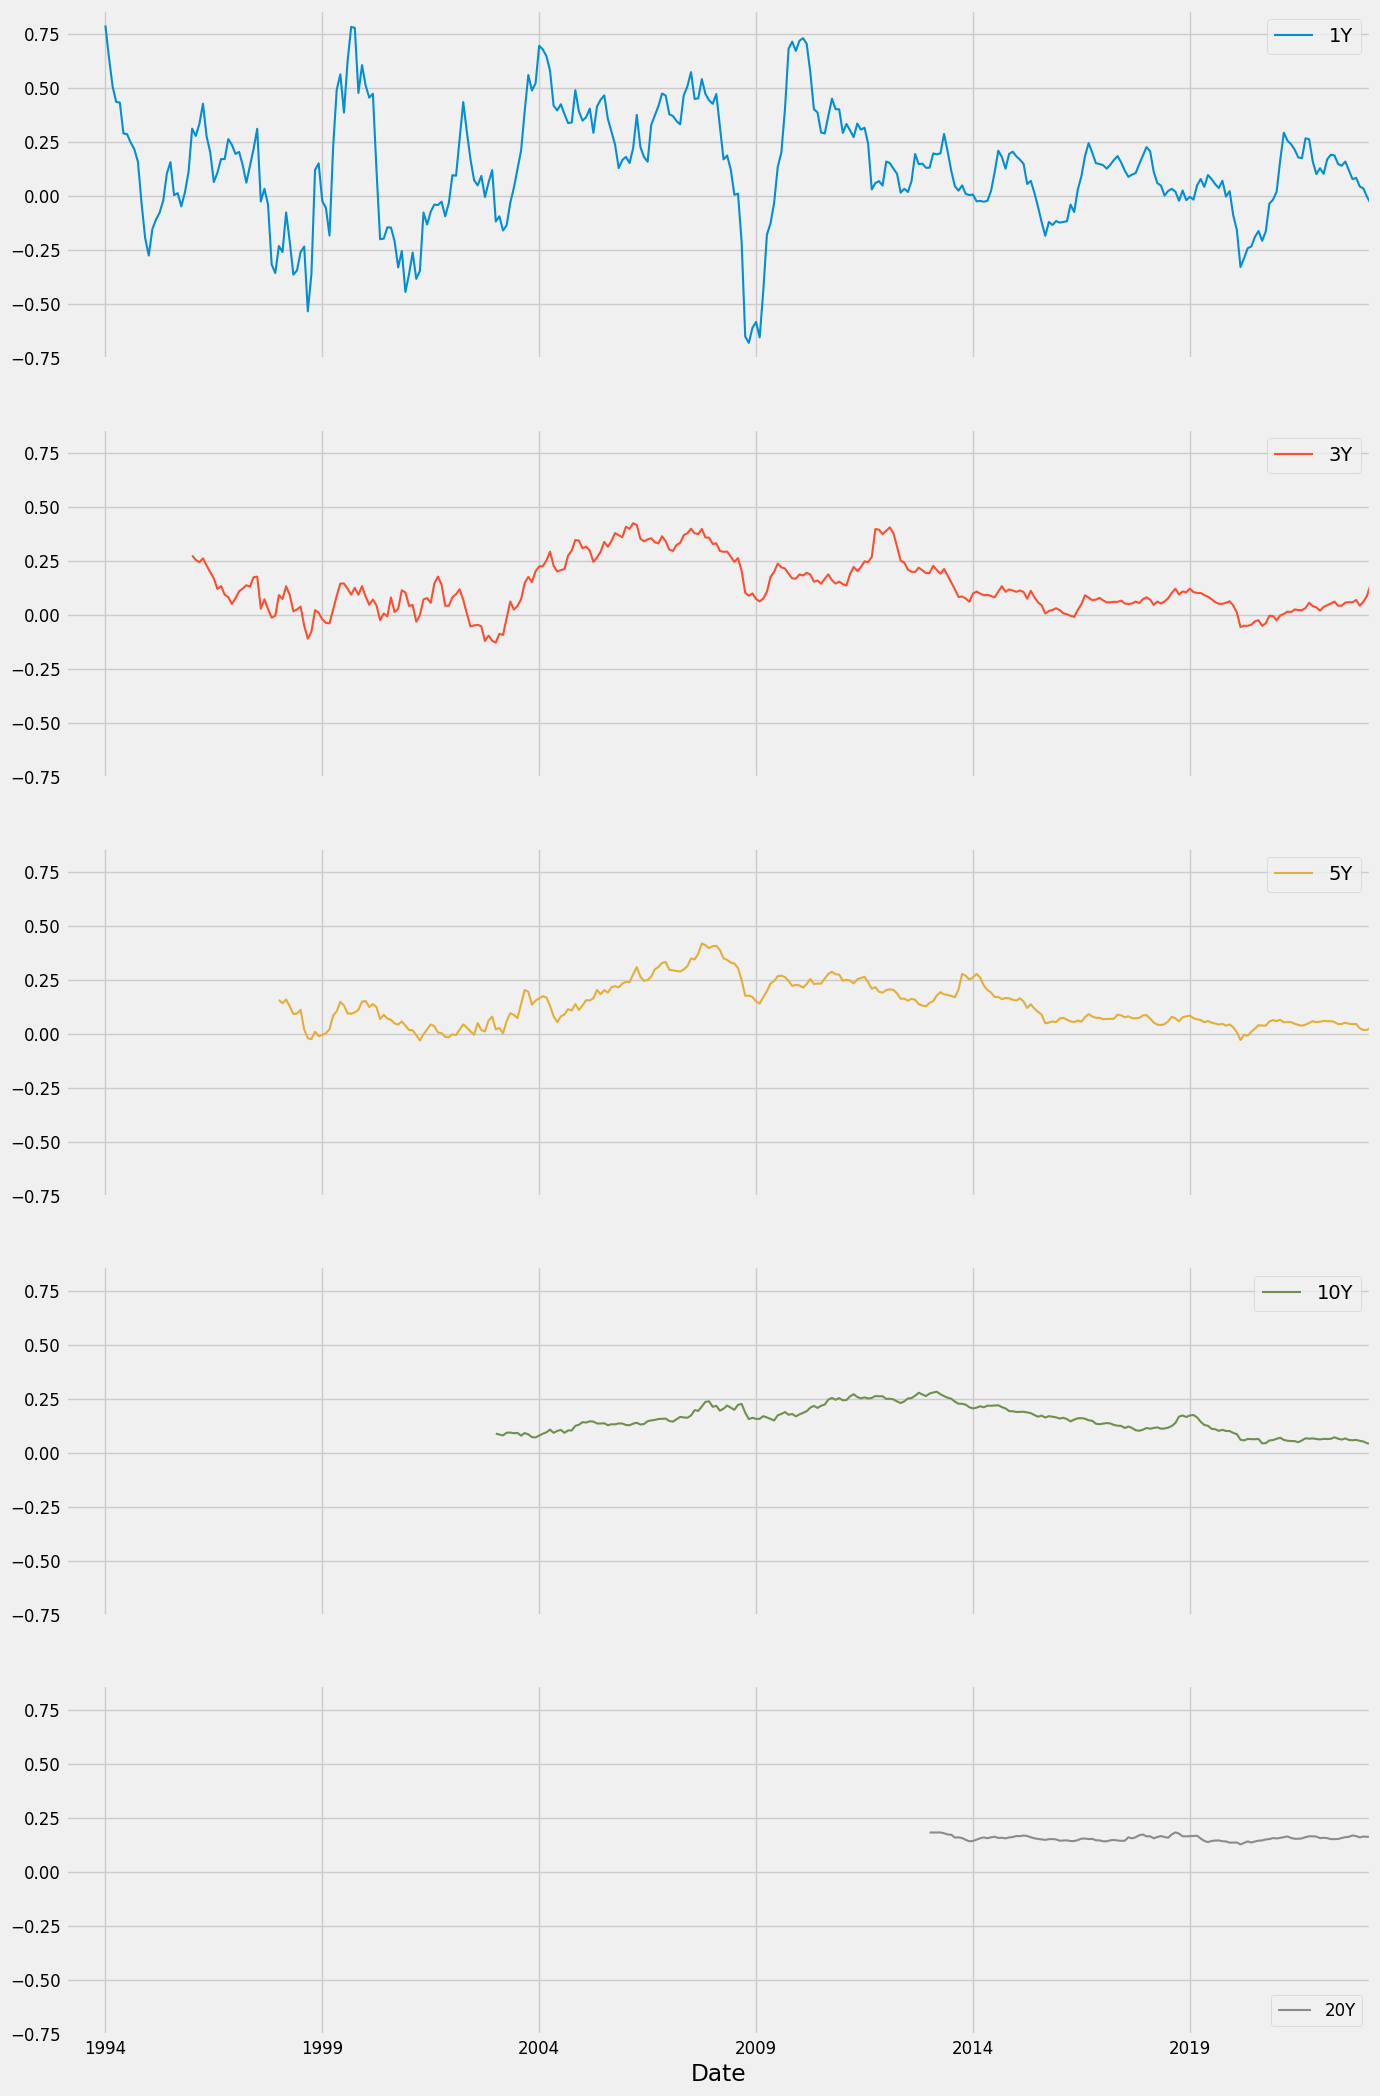

In [20]:
monthly_return.iloc[:, 1:].plot(figsize = (15,25), fontsize = 12, linewidth = 1.5, subplots = True, sharey = True)
plt.legend(loc = 'lower right', fontsize = 12)
plt.show()

# Summary 

Based on the data the longer the investment the less volatile or less risky the investment become from the **IHSG** *(Indonesian Stock index)*, your average annual return was negative by the 10th year you have invested your money, as the earlier investment the more volatile the price changes is 